## Gated Recurrent Unit - GRU 

Có hai điểm mạnh của GRU so với RNN cơ bản đó là : 
* Giảm thiểu Vanishing Gradient : Khi backprop, mỗi bước - độ dốc được tính toán và được dùng để cập nhật trọng số, và qua mỗi bước tính nếu lớp hiện tại gradient nhỏ thì lớp tiếp theo còn nhỏ hơn nữa 

--> các lớp đầu không được cập nhật 

  --> không tìm hiểu được tác dụng của các đầu vào trước đó 

  --> trí nhớ ngắn hạn
* GRU có thể học cái phụ thuộc xa hơn trong chuỗi nhờ sử dụng cơ chế gated 


Cơ chế  GRU :

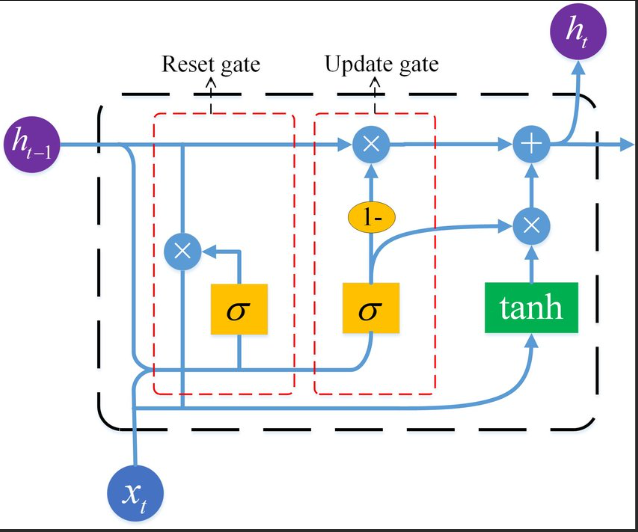

* Reset Gated 

    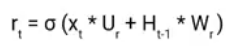

* Update Gated

    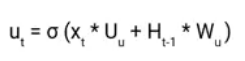
* Candidate Cell 

* Final cell state 

---------------------------------------------------------------------------
1 Unit của GRU network
 

In [1]:
import numpy as np 


In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return np.tanh(x)
def softmax(x):
    e_x = np.exp(x-np.max(x))
    return e_x/e_x.sum(axis=0)

In [3]:
input_size = 10  ## 1,10
hidden_size = 5  ## 1,5
output_size  = 3 ## 1,3

In [15]:
## Khởi tạo đầu vào h_t-1 và xt 

xt = np.random.randn(input_size,1)  # (10,1)
hprev = np.random.randn(hidden_size, 1) #(5,1)

In [10]:
Wr = np.random.randn(hidden_size,hidden_size)   
Ur = np.random.randn(hidden_size,input_size)   
Wu = np.random.randn(hidden_size,hidden_size) 
Uu = np.random.randn(hidden_size,input_size)
Wc = np.random.randn(hidden_size,hidden_size) 
Uc = np.random.randn(hidden_size,input_size)



In [23]:
def GRU_forward(Wr,Ur,Wu,Uu,Wc,Uc,xt,hprev):
    reset_gate = sigmoid(np.dot(Ur,xt) + np.dot(Wr,hprev))  # (5,10) * (10,1) + (5,5)*(5,1) = (5,1)
    update_gate = sigmoid(np.dot(Uu,xt) + np.dot(Wu,hprev)) # (5,1)

    candidate_cell = tanh(np.dot(Uc,xt) + np.dot(Wc,np.multiply(reset_gate,hprev)))

    ### if update_gate = 1 -> final_cell = h_t = candidate  else h_t = h_t-1

    h_final_cell = np.multiply((1-update_gate),hprev) + np.multiply(update_gate,candidate_cell)
    return h_final_cell

In [24]:
h_t = GRU_forward(Wr,Ur,Wu,Uu,Wc,Uc,xt,hprev)

In [25]:
h_t


array([[-0.15004043],
       [ 0.847258  ],
       [-0.50466654],
       [ 0.91692807],
       [ 0.704516  ]])

---------------------------------------------------------------------------------
Example GRU in Keras 

In [34]:
from keras.layers import GRU 
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN , Dense

In [29]:
from keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence 

In [30]:
max_feature = 10000 
maxlen = 500 
batch_size = 32 

In [31]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_feature)

In [32]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [35]:
model = Sequential()
model.add(Embedding(max_feature,32))
model.add(GRU(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [36]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 338ms/step - loss: 0.6181 - acc: 0.6355 - val_loss: 0.4407 - val_acc: 0.8016
Epoch 2/10
157/157 [==============================] - 51s 325ms/step - loss: 0.3590 - acc: 0.8442 - val_loss: 0.3821 - val_acc: 0.8310
Epoch 3/10
157/157 [==============================] - 50s 320ms/step - loss: 0.2802 - acc: 0.8868 - val_loss: 0.3174 - val_acc: 0.8666
Epoch 4/10
157/157 [==============================] - 48s 305ms/step - loss: 0.2473 - acc: 0.9056 - val_loss: 0.3459 - val_acc: 0.8694
Epoch 5/10
157/157 [==============================] - 48s 303ms/step - loss: 0.2177 - acc: 0.9173 - val_loss: 0.3157 - val_acc: 0.8738
Epoch 6/10
157/157 [==============================] - 50s 317ms/step - loss: 0.2013 - acc: 0.9236 - val_loss: 0.3711 - val_acc: 0.8524
Epoch 7/10
157/157 [==============================] - 50s 315ms/step - loss: 0.1804 - acc: 0.9345 - val_loss: 0.3345 - val_acc: 0.8742
Epoch 8/10
157/157 [==============================] - 5

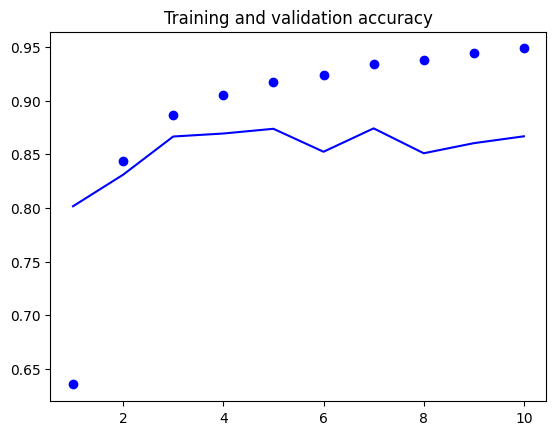

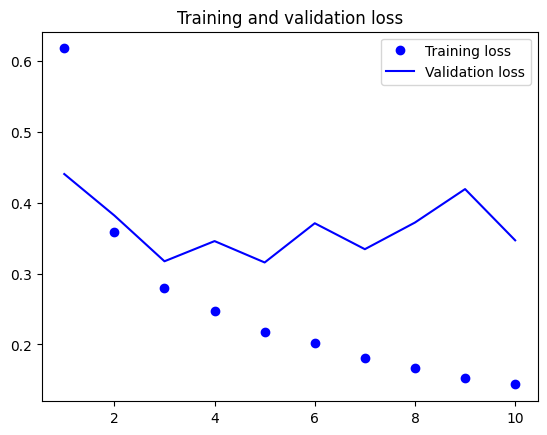

In [37]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.show()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()